<a href="https://colab.research.google.com/github/pedro-de-bastos/Knowledge-Based-Decisions-CS112/blob/master/Linear_and_Logistic_Regression_in_R_CS112_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS112 Assignment 2

## 1

### (a)


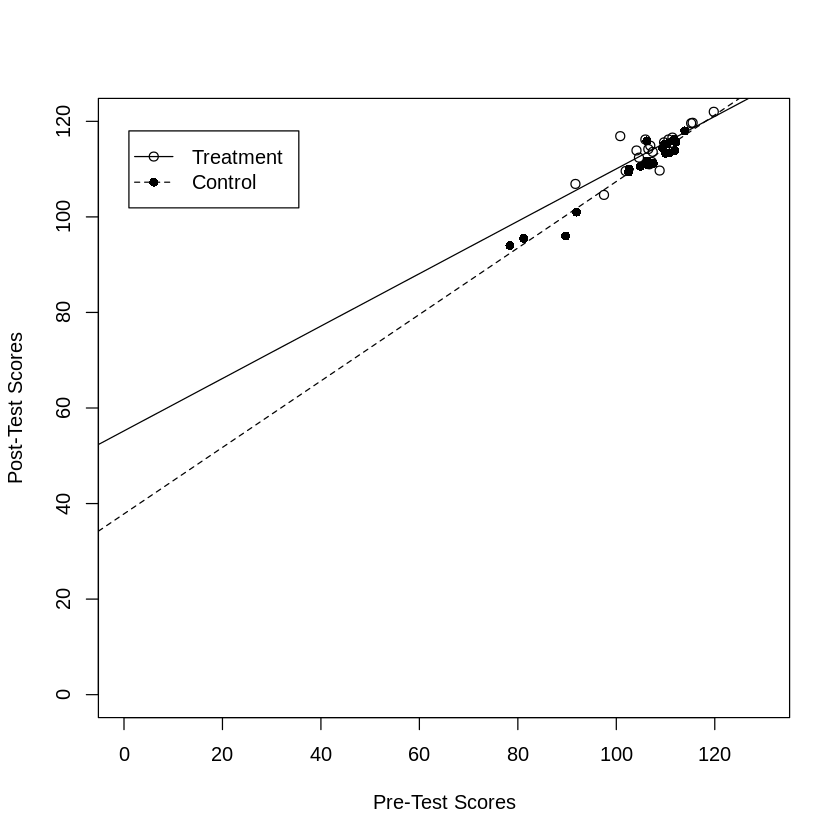

In [ ]:
sesame <- read.csv("https://tinyurl.com/wlgl63b")
treat <- which(sesame$treatment==1)
treat.group <- sesame[treat,]
cont.group <- sesame[-treat,]

treat.line <- lm(post.test~pre.test, data=treat.group)
cont.line <- lm(post.test~pre.test, data=cont.group)

plot(treat.group$pre.test, treat.group$post.test, xlim=c(0,130), ylim=c(0,120), ylab="Post-Test Scores", xlab="Pre-Test Scores")
points(cont.group$pre.test, cont.group$post.test, pch=16)
abline(treat.line)
abline(cont.line, lty=2)

legend(1,118,legend=c("Treatment","Control"), lty=c(1,2), pch=c(1, 16), ncol=1)


### (b)
My approach, in the code below, I experimented with the point in row 11 of the dataset. With the intent of making the expected treatment effect negative for all datapoints, I experimented with different shifts in terms of the y-axis quantity (Post Test score). I was able to make the expected treatment value negative for all values from 0 to 120 by shifting the point down by 60 units.



,post.test,pre.test,treatment
,<dbl>,<dbl>,<int>
11,53.9,104.1,1


,post.test,pre.test,treatment
,<dbl>,<dbl>,<int>
1,116.2,105.9,1
2,116.9,100.8,1
3,106.9,91.7,1
4,104.6,97.5,1
5,114.2,106.5,1
6,113.6,107.4,1


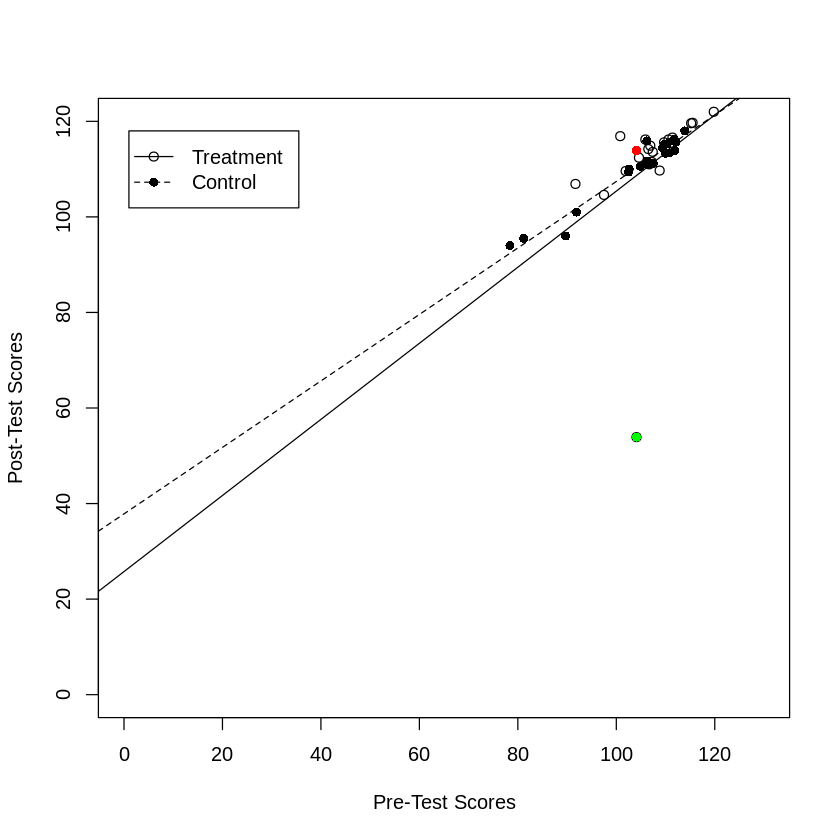

In [ ]:
sesame.modified <- data.frame(sesame)
highest.pt <- 11 #which.max(sesame.modified$post.test[sesame.modified$treatment==1]) #this is where I found the highest value in the treatment group

og.x = sesame.modified[highest.pt,2]
og.y = sesame.modified[highest.pt,1]

sesame.modified[highest.pt,1] = og.y - 60
sesame.modified[highest.pt,2] = og.x

treat <- which(sesame.modified$treatment==1)
treat.group <- sesame.modified[treat,]
cont.group <- sesame.modified[-treat,]

treat.line <- lm(post.test~pre.test, data=treat.group)
cont.line <- lm(post.test~pre.test, data=cont.group)

plot(treat.group$pre.test, treat.group$post.test, xlim=c(0,130), ylim=c(0,120), ylab="Post-Test Scores", xlab="Pre-Test Scores")
points(cont.group$pre.test, cont.group$post.test, pch=16)
points(sesame.modified[highest.pt,2], sesame.modified[highest.pt,1], col='green', pch=16)
points(og.x, og.y, col='red', pch=16)
abline(treat.line)
abline(cont.line, lty=2)

legend(1,118,legend=c("Treatment","Control"), lty=c(1,2), pch=c(1, 16), ncol=1)
sesame.modified[highest.pt,]
head(sesame.modified)



### (c)
I replicate the data visualization in Figure 9.8, below.

The lines representing the linear models for treatment effect 'converge' around the center of the graph because that is the area we have most data points inside. More data in that small area means most lines have to go through it, causing the apparent 'convergence'.

In [ ]:
install.packages("arm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lme4’




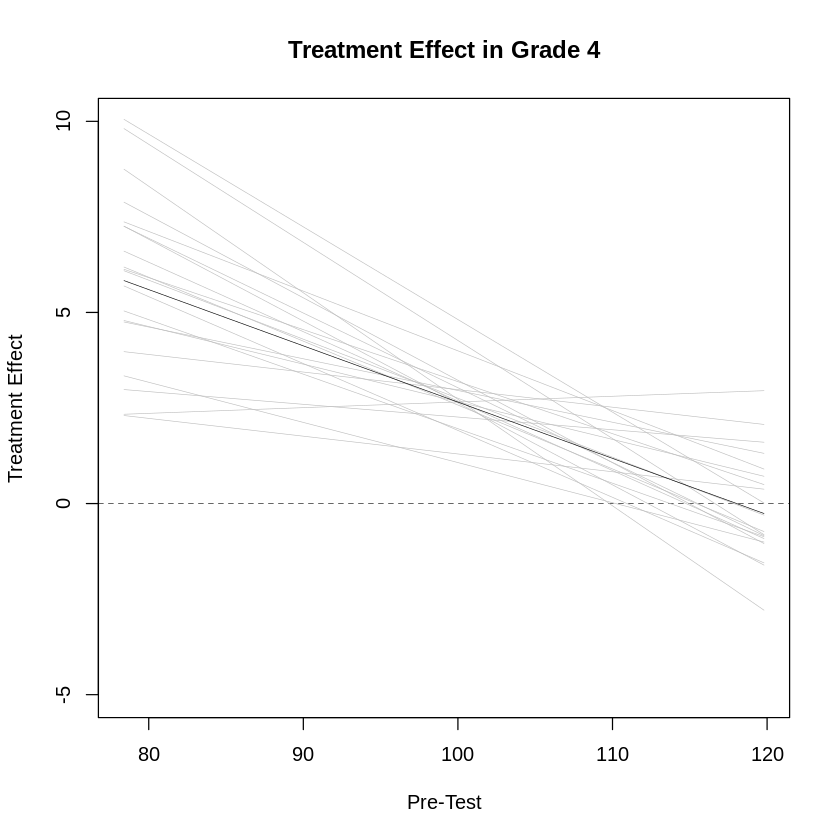

In [ ]:
library(arm)
set.seed(2)
lm <- lm(post.test~treatment+pre.test+treatment:pre.test, data=sesame)
lm.sim <- sim(lm)

plot(0, 0, xlim=range(sesame$pre.test), ylim=c(-5, 10), xlab="Pre-Test", ylab='Treatment Effect', main="Treatment Effect in Grade 4")
abline(0, 0, lwd=0.5, lty=2)
for (i in 1:20){
  curve(coef(lm.sim)[i,2]+coef(lm.sim)[i,4]*x, lwd=0.5, col="gray", add=TRUE)
}
curve(coef(lm)[2]+coef(lm)[4]*x, lwd=0.5, add=TRUE)


## 2

### (a)

In [ ]:
install.packages("arm")
library(arm)

tinting = read.csv(url("https://tinyurl.com/v4bq99k"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’, ‘abind’, ‘coda’


Loading required package: MASS

Loading required package: Matrix

Loading required package: lme4


arm (Version 1.10-1, built: 2018-4-12)


Working directory is /content




In [ ]:
lm.tinting <- lm(csoa~age+sex+target+I(tint!="no")+I(as.numeric(tint!="no")*age), data=tinting)
head(tinting)

,case,id,age,sex,tint,target,it,csoa,agegp
,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,1,1,22.4,f,no,hicon,26.00,46.80,younger
2,1,1,22.4,f,lo,hicon,32.24,37.44,younger
3,1,1,22.4,f,hi,hicon,27.04,42.64,younger
4,1,1,22.4,f,no,locon,17.68,41.60,younger
5,1,1,22.4,f,lo,locon,20.80,37.44,younger
6,1,1,22.4,f,hi,locon,26.00,40.56,younger


                         2.5%     97.5% 
21.000000 37.383322  9.778713 65.169681 
                         2.5%     97.5% 
22.000000 37.732944  9.572063 65.471407 
                         2.5%     97.5% 
23.000000 37.530057  8.793803 65.922800 
                      2.5%    97.5% 
26.00000 38.35917 10.49804 67.23715 
                      2.5%    97.5% 
27.00000 38.77716 12.17587 67.29349 
                      2.5%    97.5% 
72.00000 51.74536 23.30243 77.81029 
                      2.5%    97.5% 
73.00000 51.90003 24.88396 79.68869 
                      2.5%    97.5% 
74.00000 52.62273 24.93752 80.71936 


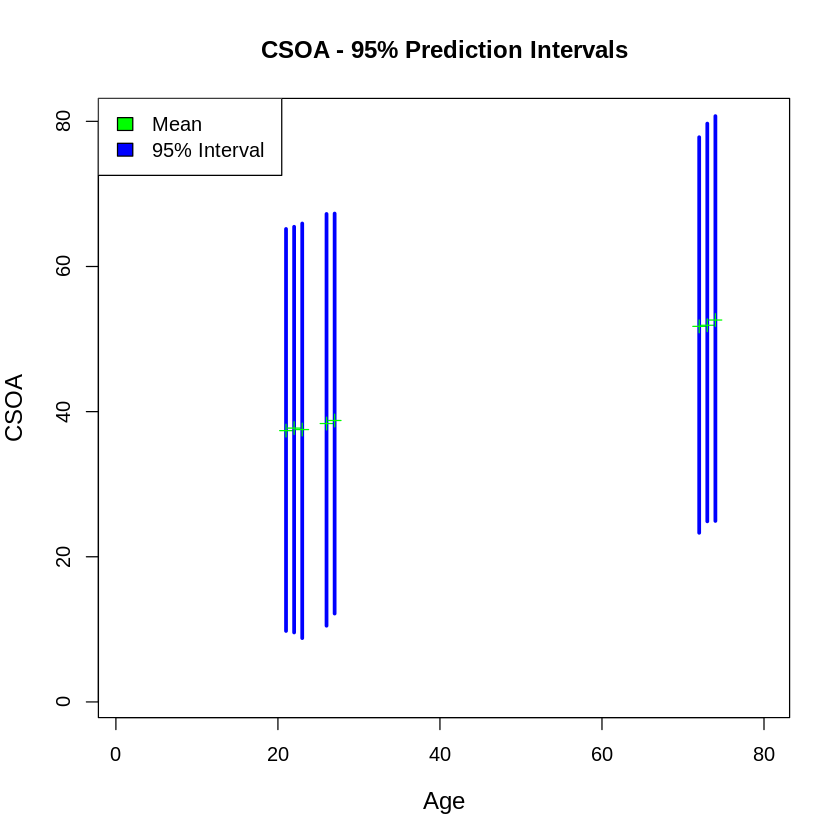

In [ ]:
filtered.tinting <- tinting[
  tinting$target=="hicon"&
  tinting$tint=="no"&
  tinting$age>=20&
  tinting$age<=80&
  tinting$sex=="f"
,]

set.seed(1)


sim.tinting = sim(lm.tinting, n.sims = 1000)
ages = c(20,30,40,50,60,70,80)

mean_quantile <- function(the_data) {
   y.predict <- c()
   for (i in 1:1000){
      y.predict <- append(y.predict,
      sim.tinting@coef[i,1]*rep(1, length(the_data$age)) + 
      sim.tinting@coef[i,2]*the_data$age +
      sim.tinting@coef[i,3]*as.numeric(the_data$sex=="m") +
      sim.tinting@coef[i,4]*as.numeric(the_data$target=="locon") +
      sim.tinting@coef[i,5]*as.numeric(the_data$tint!="no")+
      sim.tinting@coef[i,6]*as.numeric(the_data$tint!="no")*the_data$age +
      rnorm(length(the_data$age), 0, sim.tinting@sigma[1]))}
    return(c(mean(y.predict), quantile(y.predict, probs=c(0.025)), quantile(y.predict, probs=0.975)))
}

ages <- sort(unique(floor(filtered.tinting$age)))

plot(x = c(1:80), y = c(1:80), type = "n", xlim = c(1,80), ylim = c(1,80), cex.lab=1.2,
     main = "CSOA - 95% Prediction Intervals", xlab = "Age",ylab = "CSOA")

legend('topleft',legend=c('Mean','95% Interval'), fill=c('green', 'blue'))

for (age in ages) {
  age.data <- filtered.tinting[floor(filtered.tinting$age)==age,]
  mean <- mean_quantile(age.data)[1]
  lower_quantile <- mean_quantile(age.data)[2]
  upper_quantile <- mean_quantile(age.data)[3] 
  segments(x0 = age, y0 = as.numeric(lower_quantile),
           x1 = age, y1 = as.numeric(upper_quantile),lwd = 3,col='blue')
  points(x=age, y=mean, pch=3, col='green')
  print(c(age, mean, lower_quantile, upper_quantile))
}


### (b)


                                  2.5%        97.5% 
 21.00000000  -0.05072194 -27.31611187  26.85919133 
                               2.5%       97.5% 
 22.0000000   0.1421264 -27.7859558  27.4473928 
                               2.5%       97.5% 
 23.0000000  -0.3172988 -28.6850563  27.9721752 
                               2.5%       97.5% 
 26.0000000  -0.5285907 -27.7811212  27.6268861 
                               2.5%       97.5% 
 27.0000000  -0.2531202 -26.0284355  27.5205766 
                                  2.5%        97.5% 
 72.00000000  -0.05481641 -27.82585764  26.30572284 
                               2.5%       97.5% 
 73.0000000  -0.2707014 -26.6754568  26.8328324 
                               2.5%       97.5% 
 74.0000000   0.1241935 -27.2885059  28.0112020 


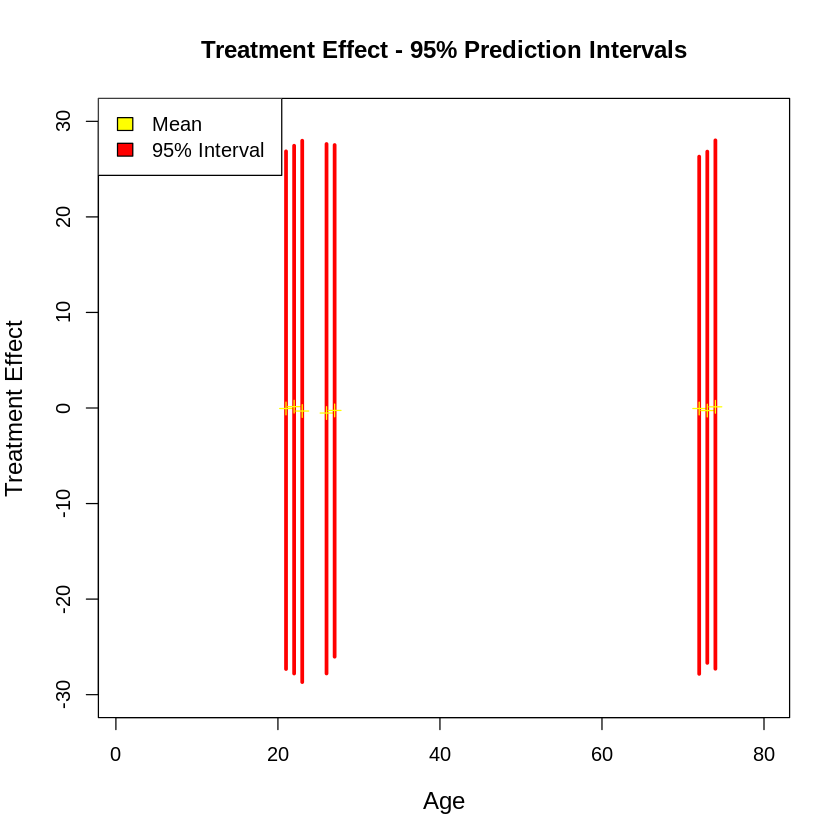

In [ ]:
filtered.tinting <- tinting[
  tinting$target=="hicon"&
  tinting$tint=="no"&
  tinting$age>=20&
  tinting$age<=80&
  tinting$sex=="f"
,]

set.seed(1)

sim.tinting = sim(lm.tinting, n.sims = 1000)

#Note: the function below shouldn't exist
shouldnt_exist <- function(the_data) {
   y.predict <- c()
   for (i in 1:1000){
      y.predict <- append(y.predict,
      sim.tinting@coef[i,5]*as.numeric(the_data$tint!="no")+
      rnorm(length(the_data$age), 0, sim.tinting@sigma[1]))}
    return(c(mean(y.predict), quantile(y.predict, probs=c(0.025)), quantile(y.predict, probs=0.975)))
}

#Note: below I run a for loop for all 1000 simulated sets of coefficients, so each row of data will have 1000 different predictions
treat_effect_stats <- function(new_data){
  treat.effect <- c()
  for (i in 1:1000){
        treat.effect <- append(treat.effect,
        (sim.tinting@coef[i,5]*as.numeric(new_data$tint=="no")))
  }
  return(c(mean(treat.effect), quantile(treat.effect, probs = c(0.025)), quantile(treat.effect, probs = c(0.975))))
}

ages <- sort(unique(floor(filtered.tinting$age)))

plot(x = c(1:80), y = c(1:80), type = "n", xlim = c(1,80), ylim = c(-30,30), cex.lab=1.2,
     main = "Treatment Effect - 95% Prediction Intervals", xlab = "Age",ylab = "Treatment Effect")

legend('topleft',legend=c('Mean','95% Interval'), fill=c('yellow', 'red'))

for (num in ages) {
  age.data <- filtered.tinting[floor(filtered.tinting$age)==num,]
  mean <- shouldnt_exist(age.data)[1]
  lower_quantile <- shouldnt_exist(age.data)[2]
  upper_quantile <- shouldnt_exist(age.data)[3] 
  segments(x0 = num, y0 = as.numeric(lower_quantile),
           x1 = num, y1 = as.numeric(upper_quantile),lwd = 3,col='red')
  points(x=num, y=mean, pch=3, col='yellow')
  print(c(num, mean, lower_quantile, upper_quantile))
}


## 3

In [ ]:
#install.packages("Matching")
library(Matching)
data(lalonde)

age_educ_black = lm(re78~age+educ+black, data=lalonde)
y.hats = predict.lm(age_educ_black)
ys = lalonde$re78

df = data.frame(y.hats, lalonde$re78)

r_squared <- function(y, y.pred){
  SSres <- sum((y-y.pred)^2)
  SStot <- sum((y-mean(y))^2)
  return(1-SSres/SStot)
}

r_squared(ys, y.hats)
cor(ys, y.hats)^2

[1] 0.03222257

[1] 0.03222257

## 4


### (a)

In [ ]:
library(foreign)

castes <- read.dta("https://github.com/pedro-de-bastos/CS112/blob/master/mazedata1.dta?raw=true")

storage <- rep("NA", 10000)

booleancastes <- castes$treatment == "Caste Revealed"
castes[,6]<-booleancastes

for (i in 1:10000){
  lm.caste <- lm(round1~treatment, data=castes[sample(1:nrow(castes), nrow(castes), replace=T),])
  storage[i] <- lm.caste$coefficients[2]
}

mean(as.numeric(storage))
quantile(as.numeric(storage), probs = c(0.025, 0.975))


[1] -0.1297408

2.5%      97.5% 
-0.5809264  0.3215031

In [ ]:
confint(lm.caste)[2,]

2.5 %     97.5 % 
-0.6325076  0.2650118

|Percentile|Bootstrapped Values|Confit Function Values|
|---|---|---|
|2.5%|-0.580926353415169|-0.632507632686238|
|97.5%|0.321503121812582|0.26501177862322|

### (c)

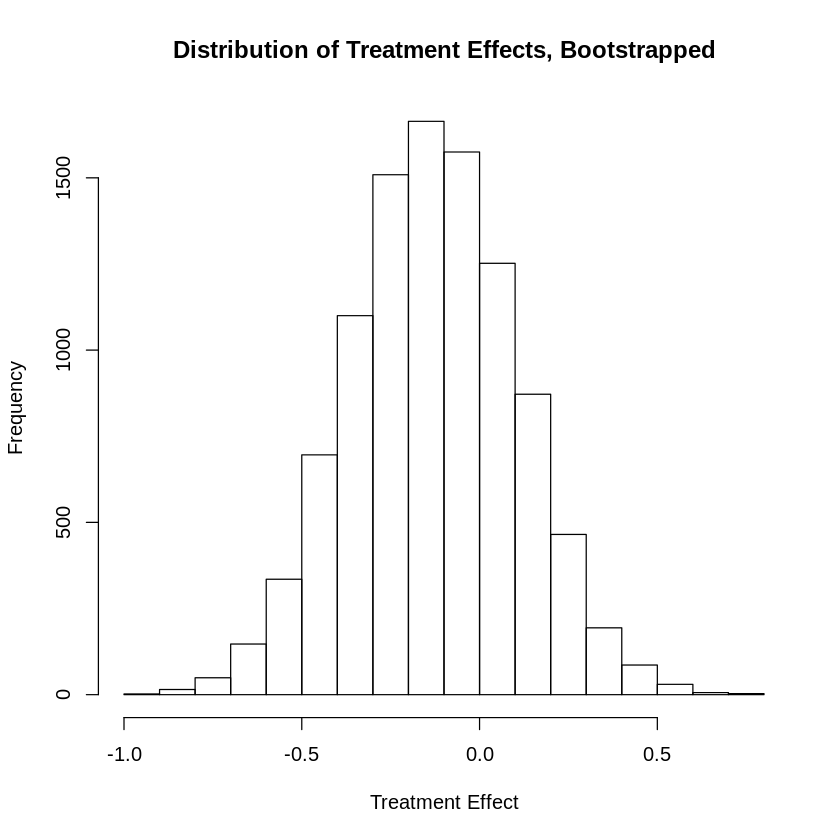

In [ ]:
hist(as.numeric(storage), xlab="Treatment Effect", main="Distribution of Treatment Effects, Bootstrapped")

# 5

In [ ]:
library(boot)
foo <- read.csv("https://tinyurl.com/yx8tqf3k")

set.seed(12345)

test_set_rows <- sample(1:length(foo$age), 2000, replace = FALSE)
train_set_rows <- 1:nrow(foo)[-test_set_rows]

sm <- glm(treat~age, data=foo[train_set_rows,], family=binomial)
cm <- glm(treat~.-re78, data=foo[train_set_rows,], family=binomial)

loocv.sm.err <- cv.glm(foo[train_set_rows,], sm) #Note: the LOOCV function here took AGES to run, and returned something quite close to the 10-fold
loocv.cm.err <- cv.glm(foo[train_set_rows,], cm)

kfcv.sm.err <- cv.glm(foo[train_set_rows,], sm, K=10)
kfcv.cm.err <- cv.glm(foo[train_set_rows,], cm, K=10)

sm.predictions <- predict(sm, foo[test_set_rows,])
cm.predictions <- predict(cm, foo[test_set_rows,])

validation.sm.err <- mean((sm.predictions-foo[test_set_rows,1])^2)
validation.cm.err <- mean((cm.predictions-foo[test_set_rows,1])^2)




The table below summarises my findings:

|Model|Mean Squared Error with Validation Set Approach|Error with LOOCV|Error with K=10 Cross Validation|
|---|---|---|---|
|Simple Model: treat~age|23.69|0.0113|0.0113|
|Complex Model: treat~.-re78|70.04|0.00792|0.00795|

Firstly, there seems to be a paradoxical finding: the complex model's error is smaller according to K-fold and LOOCV, but larger according the the MSE with the validation set. One plausible explanation for this is that the MSE calculation is very susceptible to outliers, which means that the complex model may be still the best classifier albeit with more MSE because, due to its consideration of more variables, there is a larger change of 'seeing' outliers.

Also, note that the difference between the errors calculated by LOOCV functions and K=10 CV was very small. That said, K=10 ran in seconds, whereas LOOCV took minutes. This makes sense if we think about how the algorithms work: the K-fold runs 10 different comparissions (one for each breakdown of test/training sets). The LOOCV runs n comparissions, where n is the number of data points (in this case, around 16,000). Although the K fold takes more time to compare the predictions with the test set responses (because the test set is much larger), this difference is overshadowed by the number of iterations LOOCV has to perform. Also, consider that for each iteration of the LOOCV, we fit a model to a much larger body of data (n-1 versus n-n/k).

# 6

[1] -3 -8 -2 -5 -2 -3 -1

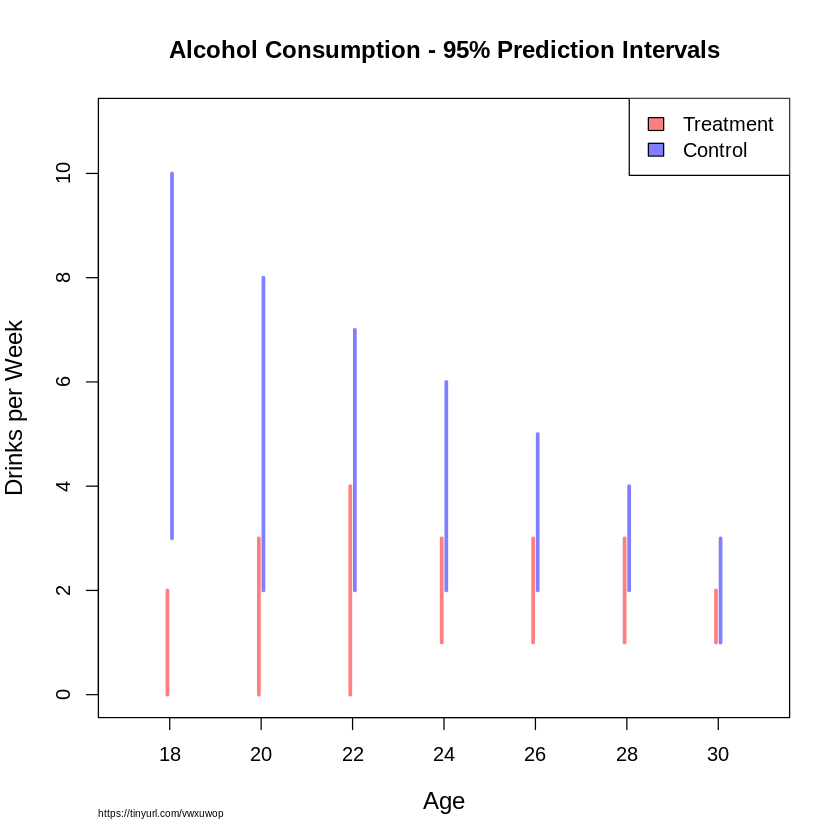

In [ ]:
trt = matrix(NA,nrow=2,ncol=7)
ctrl = matrix(NA,nrow=2,ncol=7) 

trt[,1]=c(0, 2) #18
ctrl[,1]=c(3, 10)
trt[,2]=c(0, 3) #20
ctrl[,2]=c(2, 8)
trt[,3]=c(0, 4) #22
ctrl[,3]=c(2, 7)
trt[,4]=c(1, 3) #24
ctrl[,4]=c(2, 6)
trt[,5]=c(1, 3) #26
ctrl[,5]=c(2, 5)
trt[,6]=c(1, 3) #28
ctrl[,6]=c(2, 4)
trt[,7]=c(1, 2) #30
ctrl[,7]=c(1, 3)


c1 = rgb(red = 1, green = 0, blue = 0, alpha = 0.5) #trt
c2 = rgb(red = 0, green = 0, blue = 1, alpha = 0.5) #ctrl

plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(17,31), ylim = c(0,11), cex.lab=1.2,
     main = "Alcohol Consumption - 95% Prediction Intervals", xlab = "Age",ylab = "Drinks per Week")

for (age in seq(from=18,to=30,by=2)) { 
  segments(x0 = age-0.05, y0 = trt[1, (age-18)/2+1],
           x1 = age-0.05, y1 = trt[2, (age-18)/2+1],lwd = 3,col=c1)
  
  segments(x0 = age+0.05, y0 = ctrl[1, (age-18)/2+1],
           x1 = age+0.05, y1 = ctrl[2, (age-18)/2+1],lwd = 3,col=c2)
}
legend('topright',legend=c('Treatment','Control'),fill=c(c1,c2))
mtext("https://tinyurl.com/vwxuwop", side = 1, cex = 0.5, adj = 0, padj = 10)

treat.effect <- rep(NA, 7)
for (i in 1:7){
  treat.effect[i] <- mean(trt[i])-mean(ctrl[i])
}

treat.effect

## Decision Brief

The Argentinian Department of Health has concluded an RCT with the goal of verififying the efficacy of our newly designed alcohol-awareness programme. Our results are summarised in the graph in figure 1, below, and the treatment effects stratified by age group are seen in table 1.

![Alcohol Consumption Prediction Intervals](https://drive.google.com/u/0/uc?id=13L16eIMkeSXjLiknidj83BuPw_I8dKNl&export=download)
***Figure 1***

|Age|Number of Drinks per Week Reduced, On Average|
|---|---|
|18|-3|
|20|-8|
|22|-2|
|24|-5|
|26|-2|
|28|-3|
|30|-1|
***Table 1***

From fig. 1, we can see that we are most certain about the efficacy of the intervention for the age group of 18 years. For all other age groups, our confidence intervals between control and treatment groups overlap.

Of we take a look at table 1, we can see that the treatment effects vary greatly: the greatest obtained values were for ages 20, 24, and the smallet for ages 31, 22, 26.

Taking both figures in consideration, it seems that our most robust finding was that for age 18, our treatment may be effective. On the other hand, we cannot speak to the program's effectiveness for other ages because of the lack of statistical significance. Because of the large effect size for some age groups, we are weary of potential type II errors due to potentially low statistical power (age 20 is a prime example).

Pending budget approval, our recommendation is that new studies have to be conducted with larger sample sizes. If budget is not approved, we recommend the adoption of the program with preferenctial participation of adults with ages 18 and 20, and voluntary participation of adults with older ages.
